# Data Science Job Postings on Glassdoor (Cleaned Dataset)

### Importing Dataset and Data Exploration

In [381]:
library(dplyr)

In [2]:
df <- read.csv("Cleaned_DS_Jobs.csv", header=TRUE)

head(df, 5)

Job.Title,Salary.Estimate,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Type.of.ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority


In [4]:
df_new <- df %>% select(-c("Salary.Estimate", "Job.Description", "Company.Name", "Industry", "Location", "Headquarters"))

head(df_new, 5)

Job.Title,Rating,Size,Type.of.ownership,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
Sr Data Scientist,3.1,1001 to 5000 employees,Nonprofit Organization,Insurance,Unknown / Non-Applicable,137,171,154,NY,...,27,0,0,0,0,1,0,0,data scientist,senior
Data Scientist,4.2,5001 to 10000 employees,Company - Public,Business Services,$1 to $2 billion (USD),137,171,154,VA,...,52,0,0,1,0,0,0,1,data scientist,na
Data Scientist,3.8,1001 to 5000 employees,Private Practice / Firm,Business Services,$100 to $500 million (USD),137,171,154,MA,...,39,1,1,0,0,1,0,0,data scientist,na
Data Scientist,3.5,501 to 1000 employees,Company - Public,Manufacturing,$100 to $500 million (USD),137,171,154,MA,...,20,1,1,0,0,1,0,0,data scientist,na
Data Scientist,2.9,51 to 200 employees,Company - Private,Business Services,Unknown / Non-Applicable,137,171,154,NY,...,22,1,1,0,0,0,0,0,data scientist,na


In [5]:
dim(df_new)

[1] 660  21

In [5]:
summary(df_new)

  Job.Title             Rating          Size           Type.of.ownership 
 Length:660         Min.   :0.000   Length:660         Length:660        
 Class :character   1st Qu.:3.300   Class :character   Class :character  
 Mode  :character   Median :3.800   Mode  :character   Mode  :character  
                    Mean   :3.587                                        
                    3rd Qu.:4.300                                        
                    Max.   :5.000                                        
    Sector            Revenue            min_salary      max_salary   
 Length:660         Length:660         Min.   : 31.0   Min.   : 56.0  
 Class :character   Class :character   1st Qu.: 79.0   1st Qu.:119.0  
 Mode  :character   Mode  :character   Median : 91.0   Median :133.0  
                                       Mean   : 99.3   Mean   :148.3  
                                       3rd Qu.:122.0   3rd Qu.:165.0  
                                       Max.   :212.0   M

In [6]:
# Job Title
job_title <- as.data.frame(table(df_new$Job.Title))
job_title <- job_title[order(job_title$Freq, decreasing=TRUE), ]
job_title

,Var1,Freq
,<fct>,<int>
48,Data Scientist,333
33,Data Engineer,26
137,Senior Data Scientist,19
98,Machine Learning Engineer,14
26,Data Analyst,12
134,Senior Data Analyst,6
136,Senior Data Engineer,5
47,Data Science Software Engineer,4
57,Data Scientist - TS/SCI FSP or CI Required,4


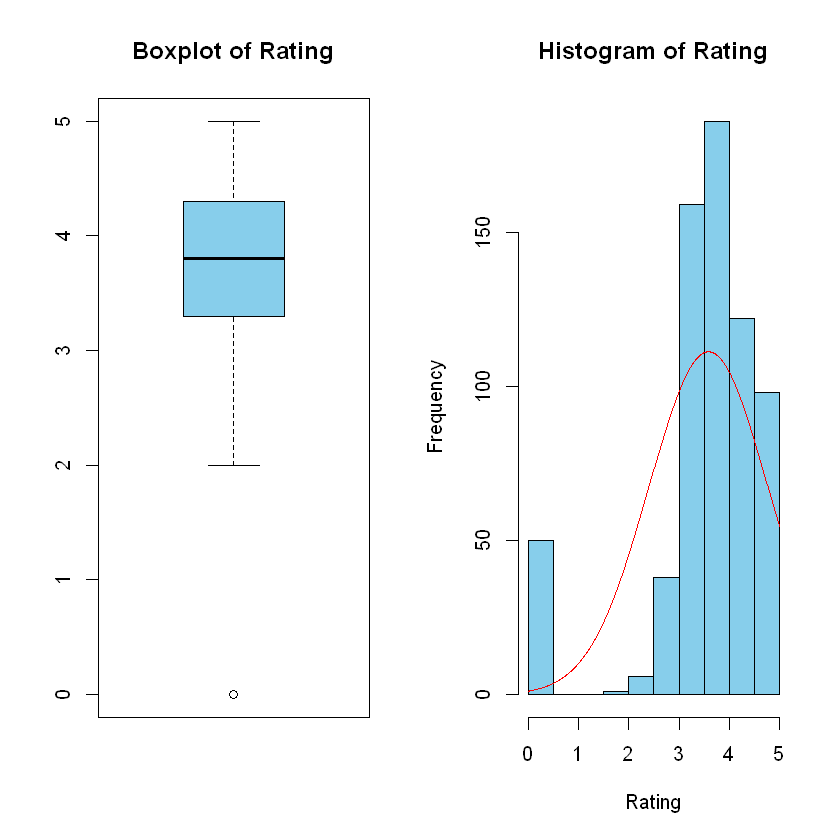

In [178]:
# Rating
par(mfrow=c(1, 2))
boxplot(df_new$Rating, main="Boxplot of Rating", col="skyblue")
hist(df_new$Rating, xlab="Rating", main="Histogram of Rating", col="skyblue")
xpt <- seq(0, 5, by=0.01)
nden <- dnorm(xpt, mean(df_new$Rating), sd(df_new$Rating))
ypt <- nden*nrow(df_new)*0.5
lines(xpt, ypt, col="red")

In [11]:
shapiro.test(df_new$Rating)


	Shapiro-Wilk normality test

data:  df_new$Rating
W = 0.76526, p-value < 2.2e-16


In [24]:
sum(df_new$Rating==0)/nrow(df_new)*100

[1] 7.575758

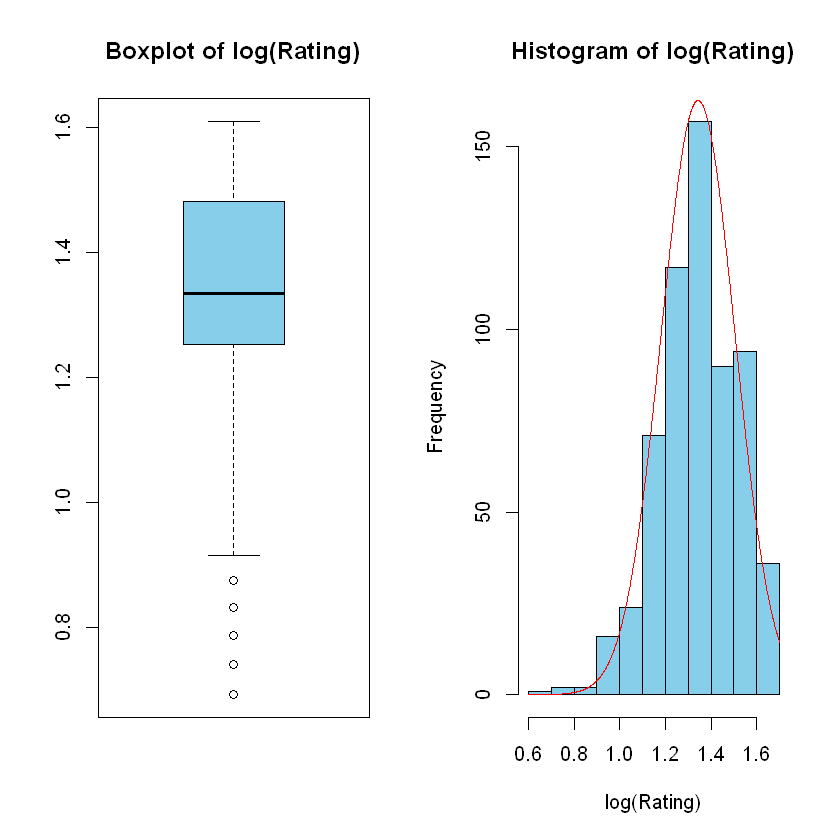

In [179]:
ln_rating <- log(df_new$Rating[df_new$Rating!=0])
par(mfrow=c(1, 2))
boxplot(ln_rating, main="Boxplot of log(Rating)", col="skyblue")
hist(ln_rating, xlab="log(Rating)", main="Histogram of log(Rating)", col="skyblue")
xpt <- seq(0.6, 1.7, by=0.001)
nden <- dnorm(xpt, mean(ln_rating), sd(ln_rating))
ypt <- nden*nrow(df_new)*0.1
lines(xpt, ypt, col="red")

In [13]:
shapiro.test(ln_rating)


	Shapiro-Wilk normality test

data:  ln_rating
W = 0.97254, p-value = 2.813e-09


In [199]:
# Company size
size <- as.data.frame(table(df_new$Size))
size <- size[order(size$Freq, decreasing=TRUE), ]
size

,Var1,Freq
8,51 to 200 employees,128
4,1001 to 5000 employees,104
2,1 to 50 employees,84
5,201 to 500 employees,83
3,10000+ employees,79
7,501 to 1000 employees,77
6,5001 to 10000 employees,61
1,-1,27
9,Unknown,17


In [200]:
(27+17)/nrow(df_new)*100

[1] 6.666667

In [201]:
size <- size[size$Var1!=-1 & size$Var1!="Unknown", ]
size

,Var1,Freq
8,51 to 200 employees,128
4,1001 to 5000 employees,104
2,1 to 50 employees,84
5,201 to 500 employees,83
3,10000+ employees,79
7,501 to 1000 employees,77
6,5001 to 10000 employees,61


[1] 20.77922

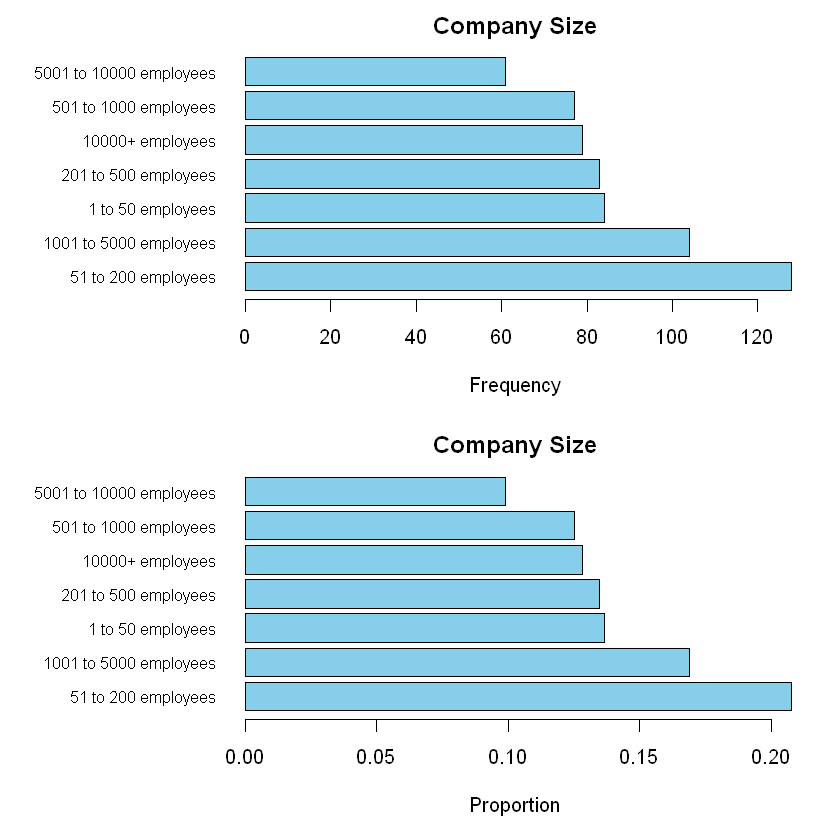

In [302]:
par(mfrow=c(2, 1))
par(mar=c(5, 10, 2, 2))
barplot(size$Freq, names.arg=size$Var1, horiz=TRUE, las=1, cex.names=0.8, xlab="Frequency", col="skyblue", main="Company Size")
barplot(prop.table(size$Freq), names.arg=size$Var1, horiz=TRUE, las=1, cex.names=0.8, xlab="Proportion", col="skyblue", main="Company Size")
size[1, 2]/sum(size$Freq)*100

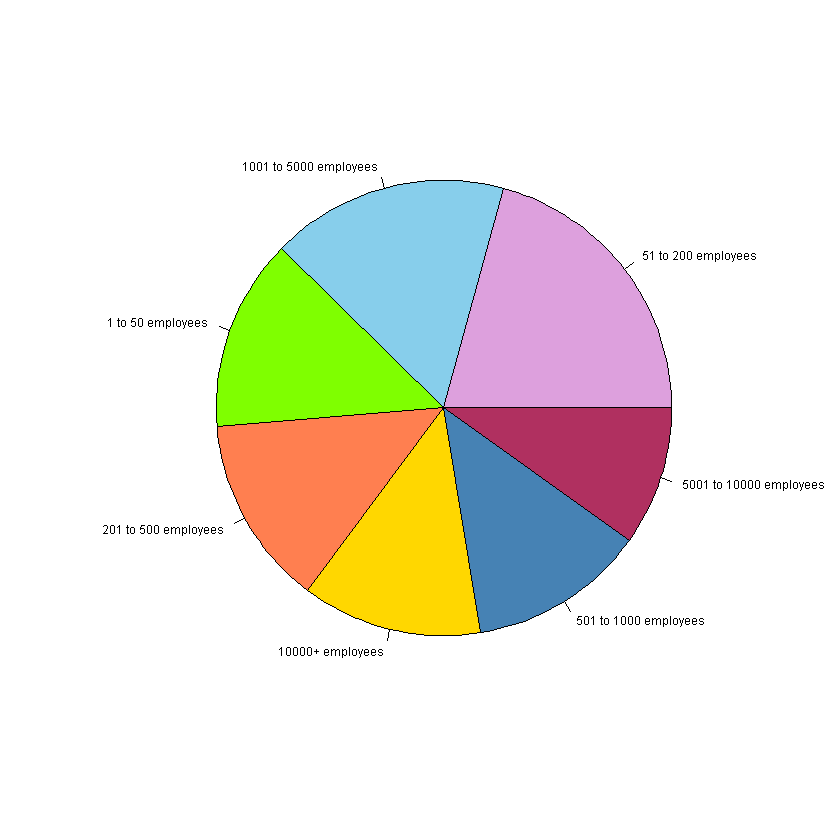

In [218]:
pie(size$Freq, labels=size$Var1, col=c("plum", "skyblue", "chartreuse", "coral", "gold", "steelblue", "maroon"), cex=0.6)

In [247]:
# Type of ownership
owner <- as.data.frame(table(df_new$Type.of.ownership))
owner <- owner[order(owner$Freq, decreasing=TRUE), ]
owner

,Var1,Freq
3,Company - Private,386
4,Company - Public,152
8,Nonprofit Organization,36
12,Subsidiary or Business Segment,28
1,-1,27
6,Government,10
9,Other Organization,5
10,Private Practice / Firm,4
13,Unknown,4
2,College / University,3


In [248]:
owner <- owner[owner$Var1!=-1 & owner$Var1!="Unknown", ]
(27+4)/nrow(df_new)*100
owner_new

[1] 4.69697

,Var1,Freq
3,Company - Private,386
4,Company - Public,152
8,Nonprofit Organization,36
12,Subsidiary or Business Segment,28
6,Government,10
9,Other Organization,5
10,Private Practice / Firm,4
2,College / University,3
5,Contract,2
11,Self-employed,2


[1] 61.36725

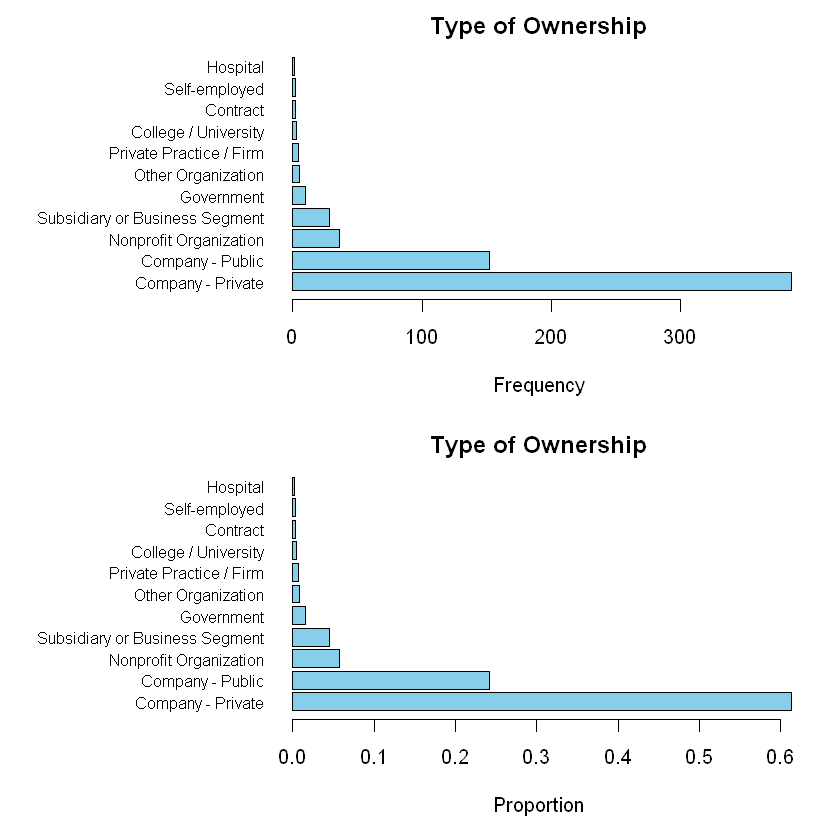

In [303]:
par(mfrow=c(2, 1))
par(mar=c(5, 12, 2, 2))
barplot(owner$Freq, names.arg=owner$Var1, horiz=TRUE, las=1, cex.names=0.8, xlab="Frequency", col="skyblue", main="Type of Ownership")
barplot(prop.table(owner$Freq), names.arg=owner$Var1, horiz=TRUE, las=1, cex.names=0.8, xlab="Proportion", col="skyblue", 
        main="Type of Ownership")
owner[1, 2]/sum(owner$Freq)*100

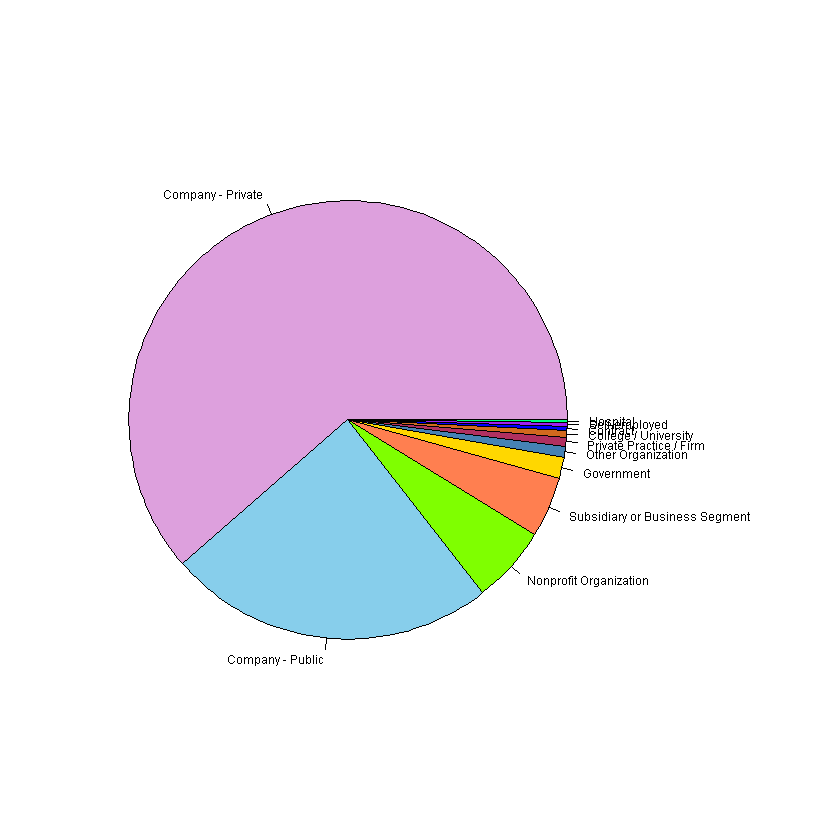

In [252]:
par(mar=c(2, 2, 2, 8))
pie(owner$Freq, labels=owner$Var1, col=c("plum", "skyblue", "chartreuse", "coral", "gold", "steelblue", "maroon", 
                                        "chocolate", "blue", "purple", "springgreen"), cex=0.6)

In [274]:
# Sector
sector <- as.data.frame(table(df_new$Sector))
sector <- sector[order(sector$Freq, decreasing=TRUE), ]
sector

,Var1,Freq
13,Information Technology,178
6,Business Services,120
1,-1,71
5,Biotech & Pharmaceuticals,66
3,Aerospace & Defense,46
14,Insurance,32
10,Finance,31
15,Manufacturing,23
12,Health Care,21
11,Government,17


In [275]:
sector[3, 2]/nrow(df_new)*100
sector <- sector[sector$Var1!=-1, ]
sector

[1] 10.75758

,Var1,Freq
13,Information Technology,178
6,Business Services,120
5,Biotech & Pharmaceuticals,66
3,Aerospace & Defense,46
14,Insurance,32
10,Finance,31
15,Manufacturing,23
12,Health Care,21
11,Government,17
18,"Oil, Gas, Energy & Utilities",10


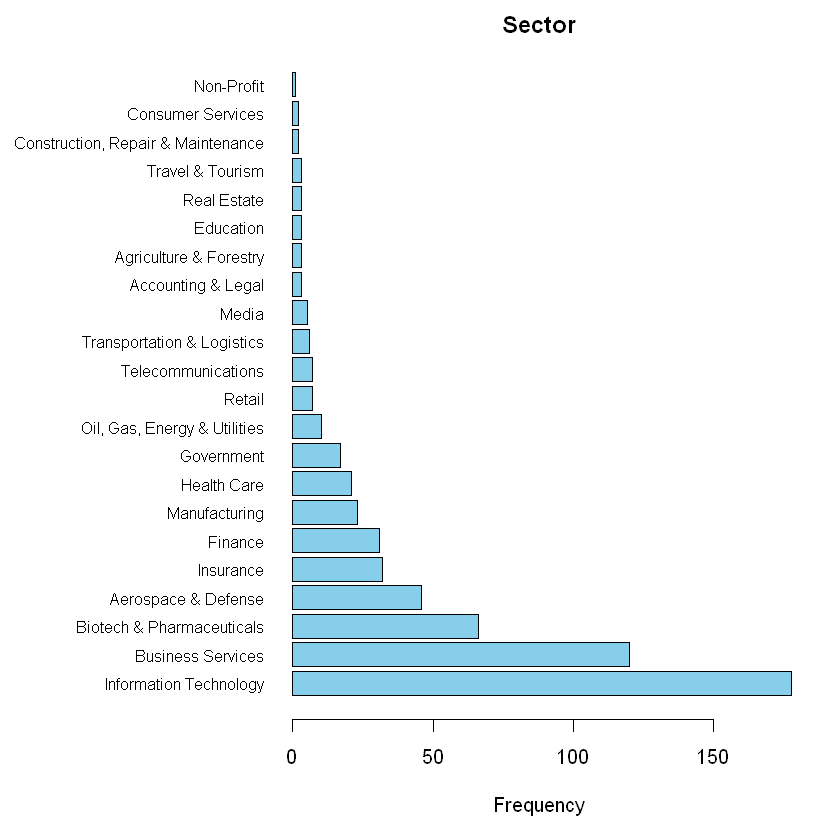

In [287]:
par(mar=c(5, 12, 2, 2))
barplot(sector$Freq, names.arg=sector$Var1, horiz=TRUE, las=1, cex.names=0.8, xlab="Frequency", col="skyblue", main="Sector")

[1] 30.22071

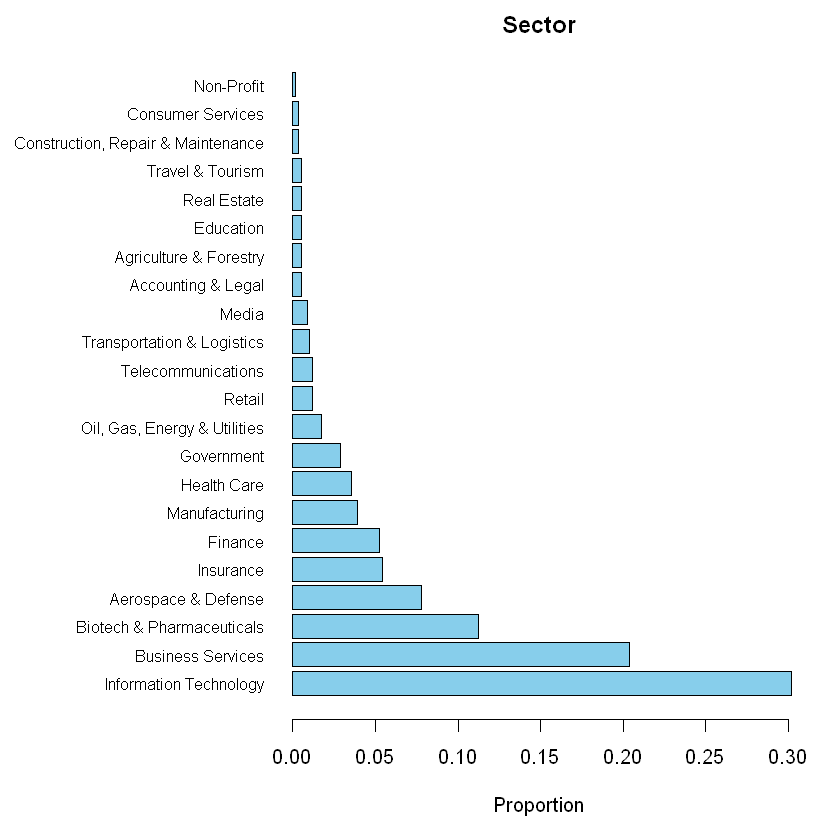

In [304]:
par(mar=c(5, 12, 2, 2))
barplot(prop.table(sector$Freq), names.arg=sector$Var1, horiz=TRUE, las=1, cex.names=0.8, xlab="Proportion", col="skyblue", 
        main="Sector")
sector[1, 2]/sum(sector$Freq)*100

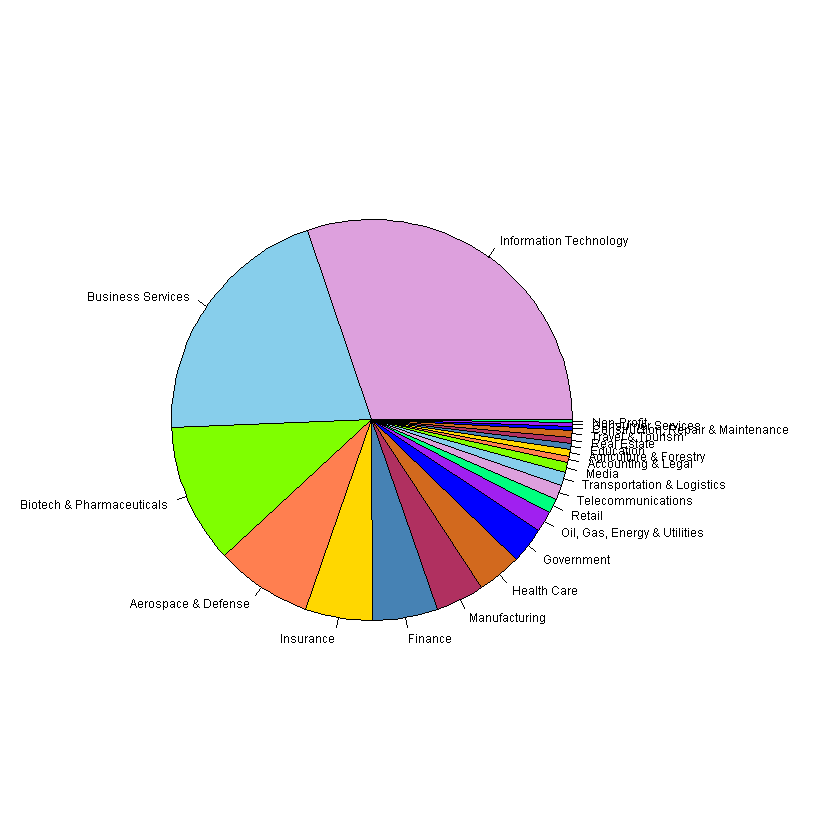

In [293]:
par(mar=c(2, 4, 2, 8))
pie(sector$Freq, labels=sector$Var1, col=c("plum", "skyblue", "chartreuse", "coral", "gold", "steelblue", "maroon", 
                                        "chocolate", "blue", "purple", "springgreen"), cex=0.6)

In [294]:
# Revenue
revenue <- as.data.frame(table(df_new$Revenue))
revenue <- revenue[order(revenue$Freq, decreasing=TRUE), ]
revenue

,Var1,Freq
14,Unknown / Non-Applicable,206
6,$100 to $500 million (USD),94
5,$10+ billion (USD),62
7,$2 to $5 billion (USD),45
4,$10 to $25 million (USD),40
2,$1 to $2 billion (USD),36
8,$25 to $50 million (USD),35
3,$1 to $5 million (USD),31
11,$50 to $100 million (USD),31
1,-1,27


In [307]:
(206+27)/nrow(df_new)*100

[1] 35.30303

In [297]:
revenue <- revenue[revenue$Var1!=-1 & revenue$Var1!="Unknown / Non-Applicable", ]
revenue

,Var1,Freq
6,$100 to $500 million (USD),94
5,$10+ billion (USD),62
7,$2 to $5 billion (USD),45
4,$10 to $25 million (USD),40
2,$1 to $2 billion (USD),36
8,$25 to $50 million (USD),35
3,$1 to $5 million (USD),31
11,$50 to $100 million (USD),31
12,$500 million to $1 billion (USD),19
10,$5 to $10 million (USD),14


[1] 22.01405

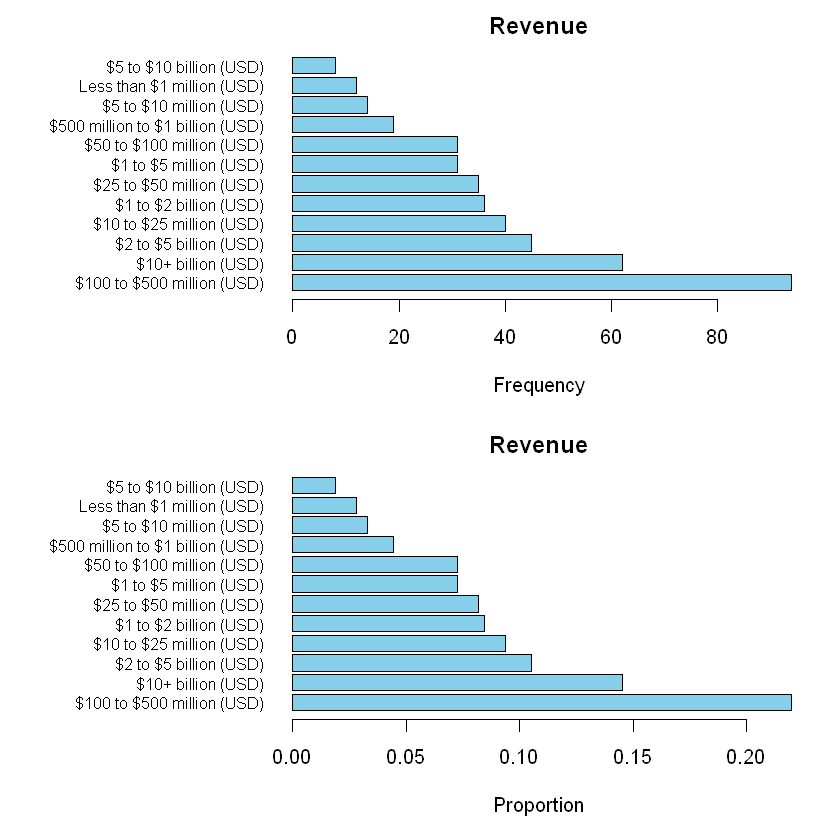

In [306]:
par(mfrow=c(2, 1))
par(mar=c(5, 12, 2, 2))
barplot(revenue$Freq, names.arg=revenue$Var1, horiz=TRUE, las=1, cex.names=0.8, xlab="Frequency", col="skyblue", main="Revenue")
barplot(prop.table(revenue$Freq), names.arg=revenue$Var1, horiz=TRUE, las=1, cex.names=0.8, xlab="Proportion", col="skyblue", 
        main="Revenue")
revenue[1, 2]/sum(revenue$Freq)*100

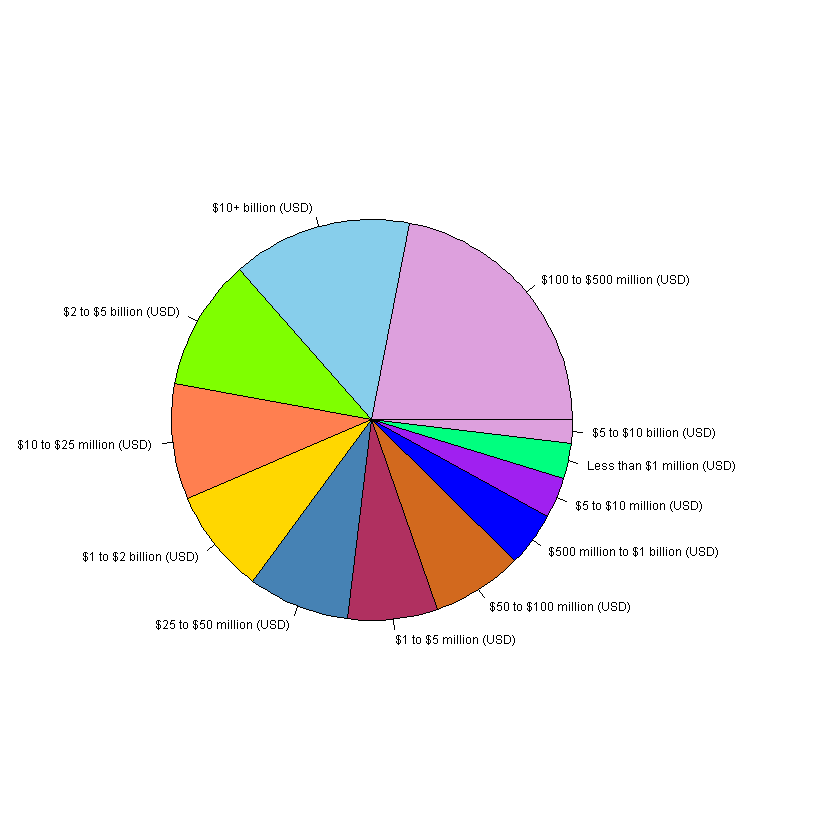

In [305]:
par(mar=c(2, 4, 2, 8))
pie(revenue$Freq, labels=revenue$Var1, col=c("plum", "skyblue", "chartreuse", "coral", "gold", "steelblue", "maroon", 
                                        "chocolate", "blue", "purple", "springgreen"), cex=0.6)

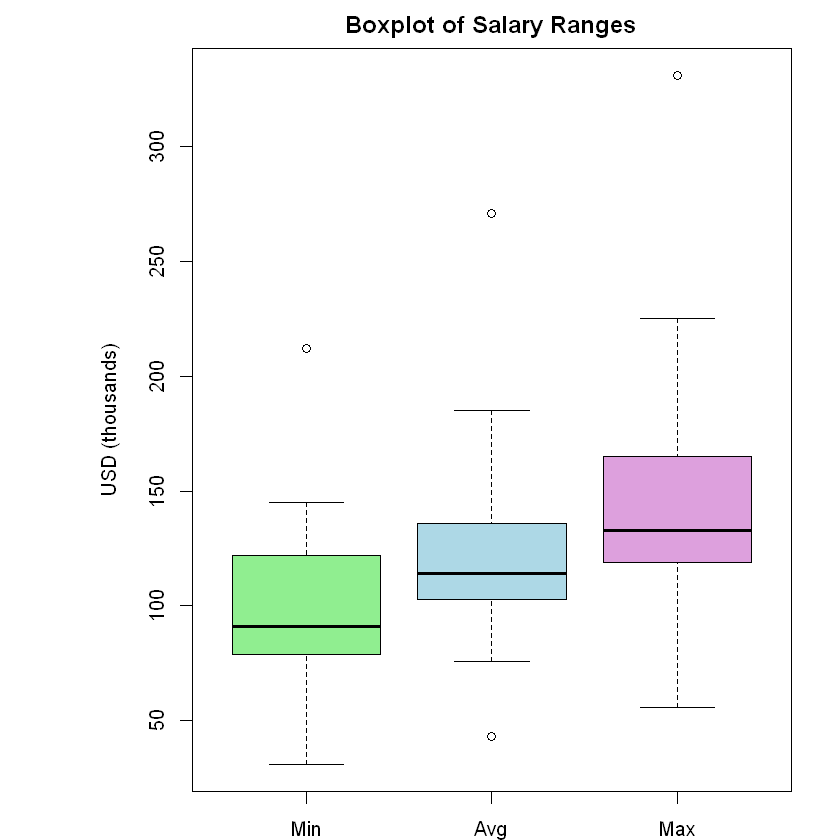

In [180]:
# Salaries
par(mar=c(2, 8, 2, 2))
boxplot(df_new$min_salary, df_new$avg_salary, df_new$max_salary, names=c("Min", "Avg", "Max"), ylab="USD (thousands)", 
        col=c("lightgreen", "lightblue", "plum"), main="Boxplot of Salary Ranges")

In [181]:
min <- as.data.frame(table(df_new$min_salary))
min <- min[order(min$Var1, decreasing=TRUE), ]
head(min)

,Var1,Freq
26,212,21
25,145,19
24,141,20
23,138,21
22,137,29
21,128,21


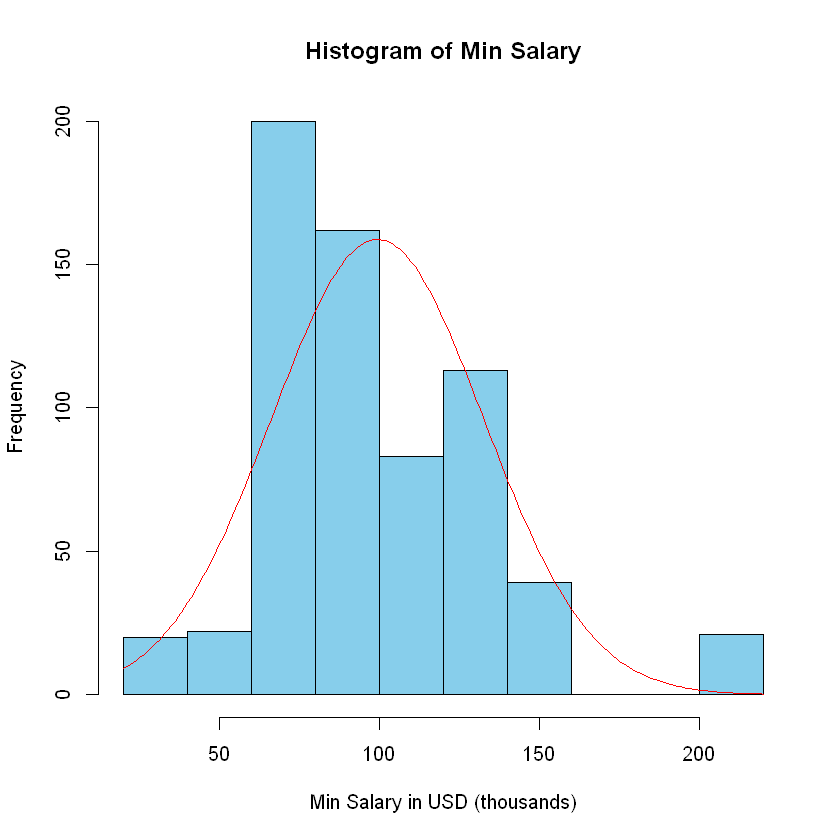

In [147]:
hist(df_new$min_salary, xlab="Min Salary in USD (thousands)", main="Histogram of Min Salary", col="skyblue")
xpt <- seq(20, 220, by=1)
nden <- dnorm(xpt, mean(df_new$min_salary), sd(df_new$min_salary))
ypt <- nden*nrow(df_new)*20
lines(xpt, ypt, col="red")

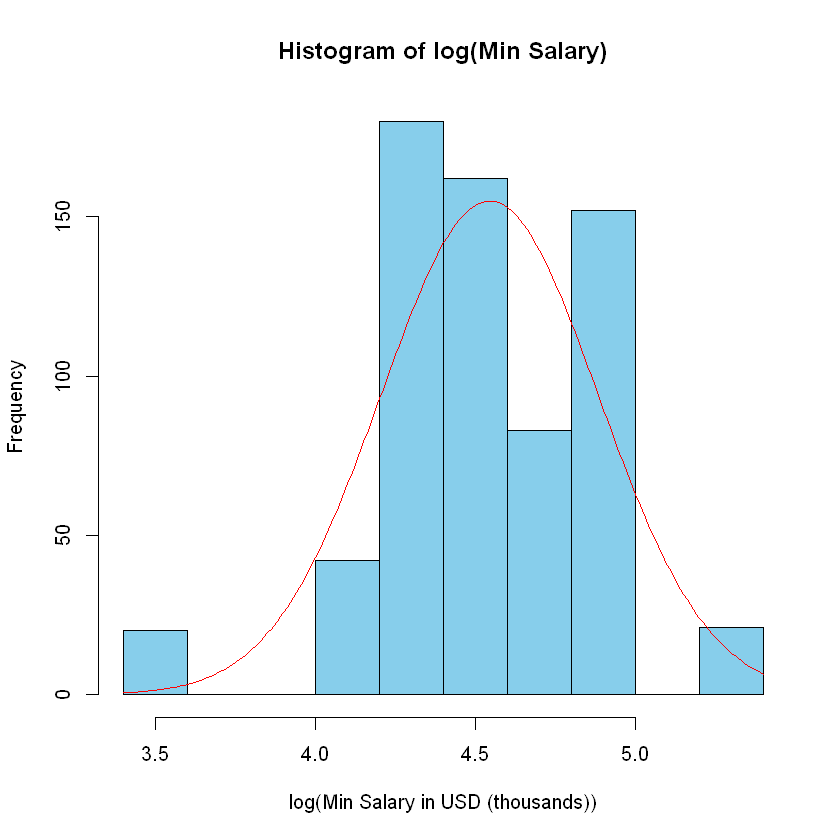

In [186]:
ln_min <- log(df_new$min_salary)
hist(ln_min, xlab="log(Min Salary in USD (thousands))", main="Histogram of log(Min Salary)", col="skyblue")
xpt <- seq(3.4, 5.4, by=0.01)
nden <- dnorm(xpt, mean(ln_min), sd(ln_min))
ypt <- nden*nrow(df_new)*0.2
lines(xpt, ypt, col="red")

In [182]:
avg <- as.data.frame(table(df_new$avg_salary))
avg <- avg[order(avg$Var1, decreasing=TRUE), ]
head(avg)

,Var1,Freq
25,271,21
24,185,19
23,183,20
22,164,21
21,161,21
20,154,29


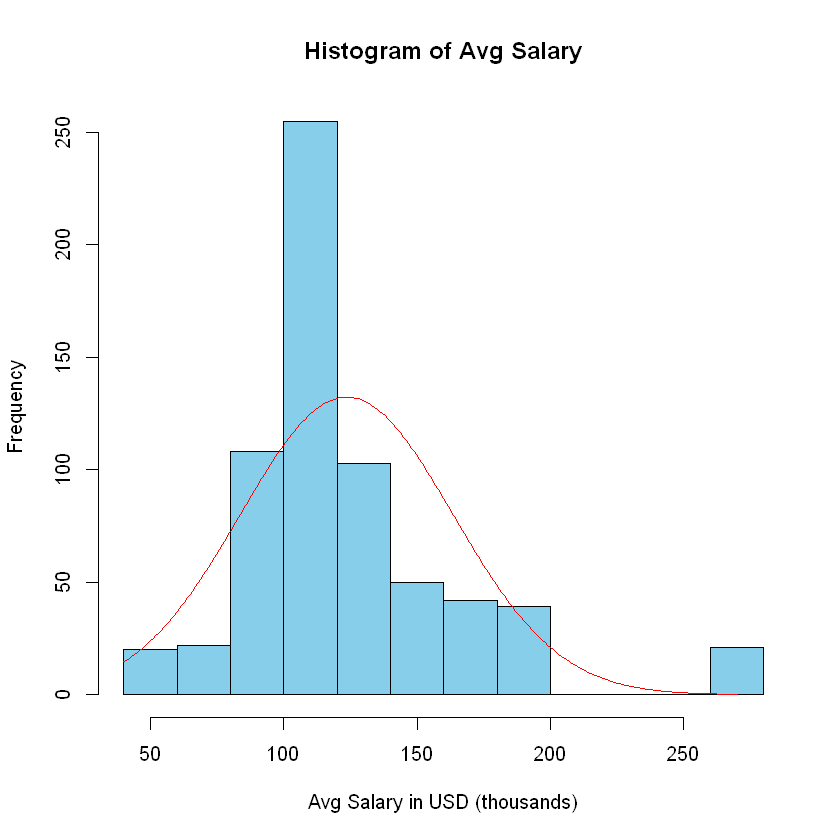

In [148]:
hist(df_new$avg_salary, xlab="Avg Salary in USD (thousands)", main="Histogram of Avg Salary", col="skyblue")
xpt <- seq(40, 270, by=1)
nden <- dnorm(xpt, mean(df_new$avg_salary), sd(df_new$avg_salary))
ypt <- nden*nrow(df_new)*20
lines(xpt, ypt, col="red")

In [183]:
max <- as.data.frame(table(df_new$max_salary))
max <- max[order(max$Var1, decreasing=TRUE), ]
head(max)

,Var1,Freq
26,331,21
25,225,39
24,201,21
23,198,21
22,171,29
21,167,20


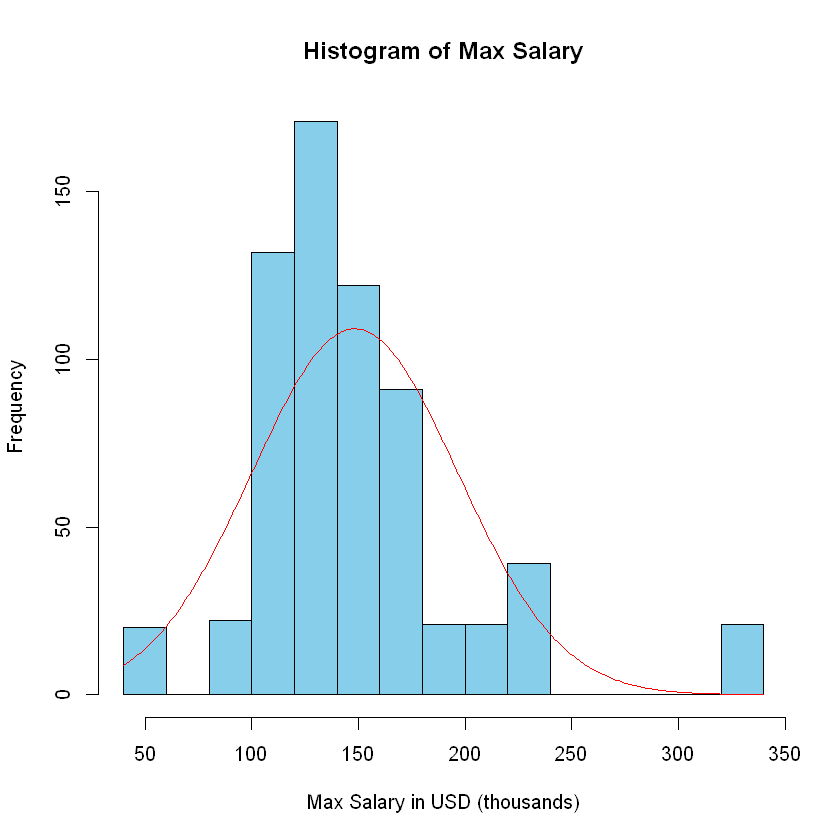

In [152]:
hist(df_new$max_salary, xlab="Max Salary in USD (thousands)", main="Histogram of Max Salary", col="skyblue")
xpt <- seq(40, 340, by=1)
nden <- dnorm(xpt, mean(df_new$max_salary), sd(df_new$max_salary))
ypt <- nden*nrow(df_new)*20
lines(xpt, ypt, col="red")

In [313]:
# Job State
state <- as.data.frame(table(df_new$job_state))
state <- state[order(state$Freq, decreasing=TRUE), ]
state

,Var1,Freq
3,CA,165
35,VA,89
15,MA,62
25,NY,52
16,MD,40
11,IL,30
6,DC,26
33,TX,17
36,WA,16
26,OH,14


In [318]:
11/nrow(df_new)*100
state <- state[state$Var1!="US", ]
state

[1] 1.666667

,Var1,Freq
3,CA,165
35,VA,89
15,MA,62
25,NY,52
16,MD,40
11,IL,30
6,DC,26
33,TX,17
36,WA,16
26,OH,14


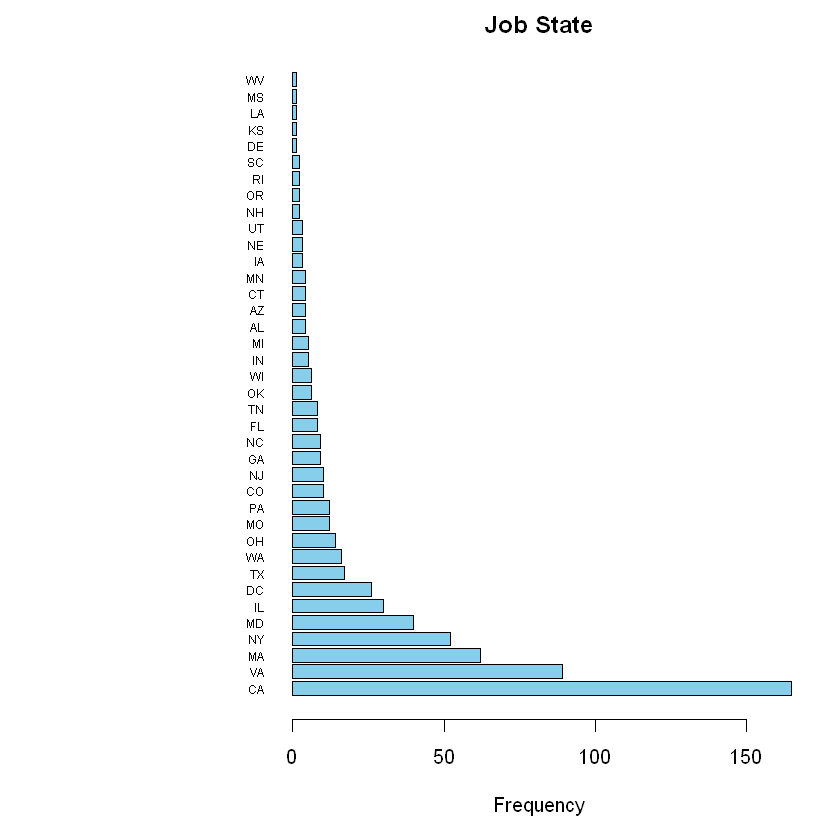

In [319]:
par(mar=c(5, 12, 2, 2))
barplot(state$Freq, names.arg=state$Var1, horiz=TRUE, las=1, cex.names=0.6, xlab="Frequency", col="skyblue", main="Job State")

[1] 25.42373

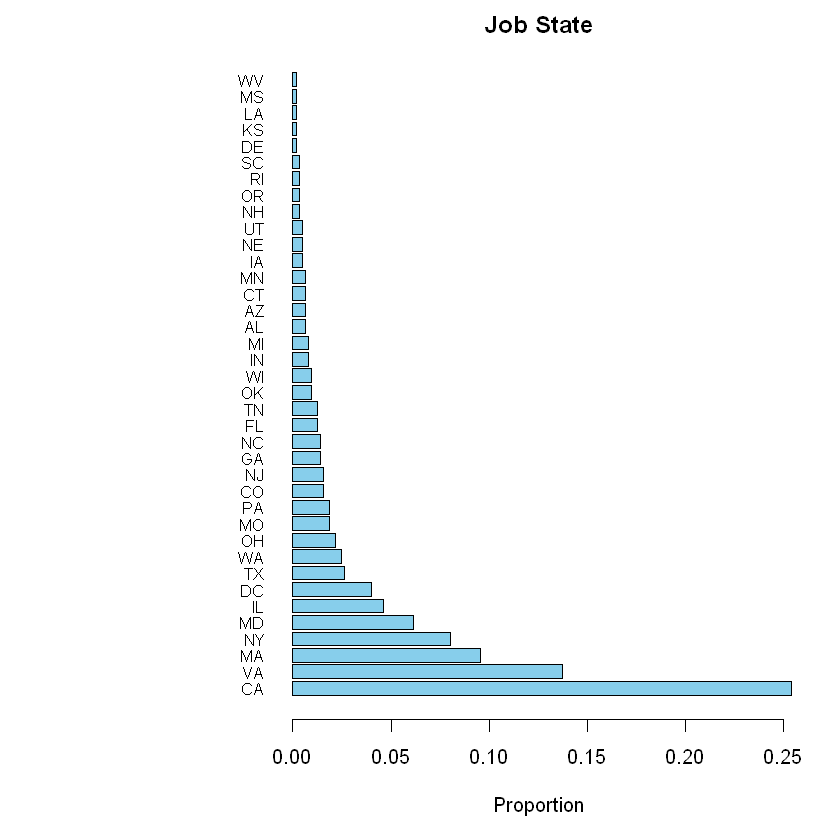

In [320]:
par(mar=c(5, 12, 2, 2))
barplot(prop.table(state$Freq), names.arg=state$Var1, horiz=TRUE, las=1, cex.names=0.8, xlab="Proportion", col="skyblue", 
        main="Job State")
state[1, 2]/sum(state$Freq)*100

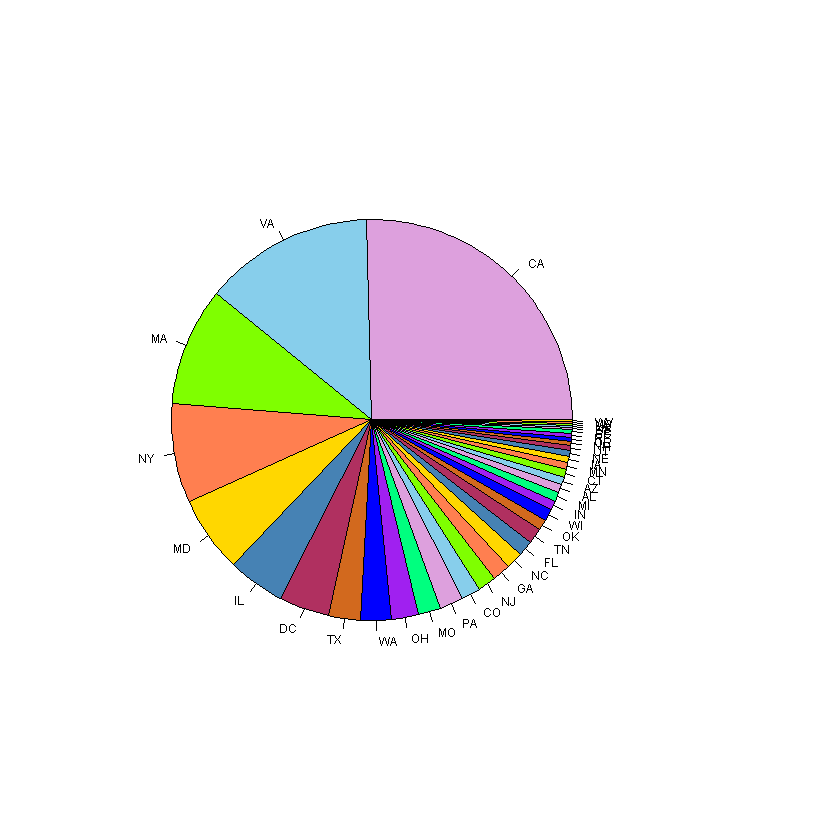

In [321]:
par(mar=c(2, 4, 2, 8))
pie(state$Freq, labels=state$Var1, col=c("plum", "skyblue", "chartreuse", "coral", "gold", "steelblue", "maroon", 
                                        "chocolate", "blue", "purple", "springgreen"), cex=0.6)

In [308]:
# Same State
same_state <- as.data.frame(table(df_new$same_state))
same_state <- same_state[order(same_state$Freq, decreasing=TRUE), ]
same_state

Var1,Freq
0,391
1,269


[1] 59.24242

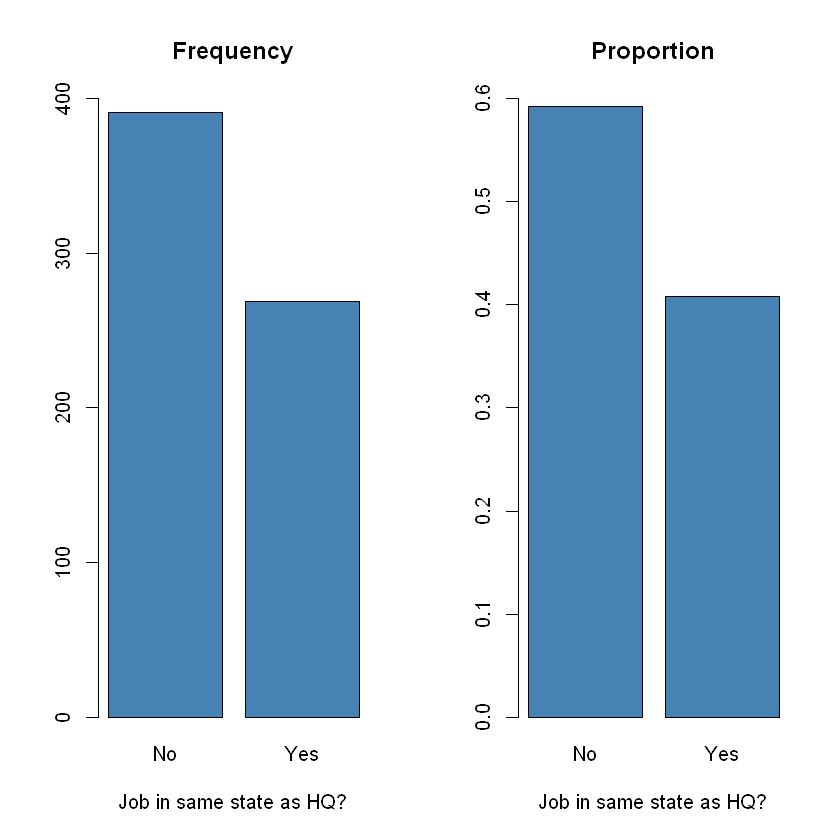

In [333]:
par(mfrow=c(1, 2))
barplot(table(df_new$same_state), col="steelblue", names.arg=c("No", "Yes"), ylim=c(0, 400), xlab="Job in same state as HQ?", 
       main="Frequency")
barplot(prop.table(same_state$Freq), col="steelblue", names.arg=c("No", "Yes"), ylim=c(0, 0.6), xlab="Job in same state as HQ?", 
       main="Proportion")
same_state[1, 2]/nrow(df_new)*100

In [322]:
# Company Age
summary(df_new$company_age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -1.00    5.00   16.00   29.74   37.25  239.00 

In [168]:
age <- as.data.frame(table(df_new$company_age))
age <- age[order(age$Var1, decreasing=TRUE), ]
head(age)

,Var1,Freq
103,239,2
102,232,1
101,200,1
100,190,2
99,171,1
98,170,2


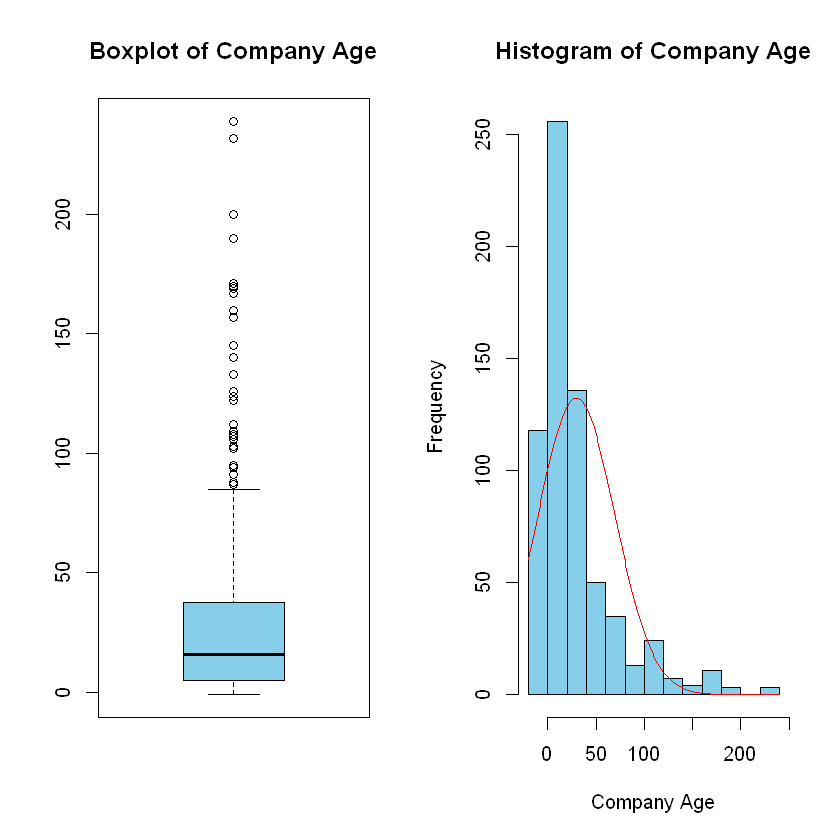

In [323]:
par(mfrow=c(1, 2))
boxplot(df_new$company_age, main="Boxplot of Company Age", col="skyblue")
hist(df_new$company_age, xlab="Company Age", main="Histogram of Company Age", col="skyblue")
xpt <- seq(-20, 240, by=1)
nden <- dnorm(xpt, mean(df_new$company_age), sd(df_new$company_age))
ypt <- nden*nrow(df_new)*20
lines(xpt, ypt, col="red")

[1] 17.87879

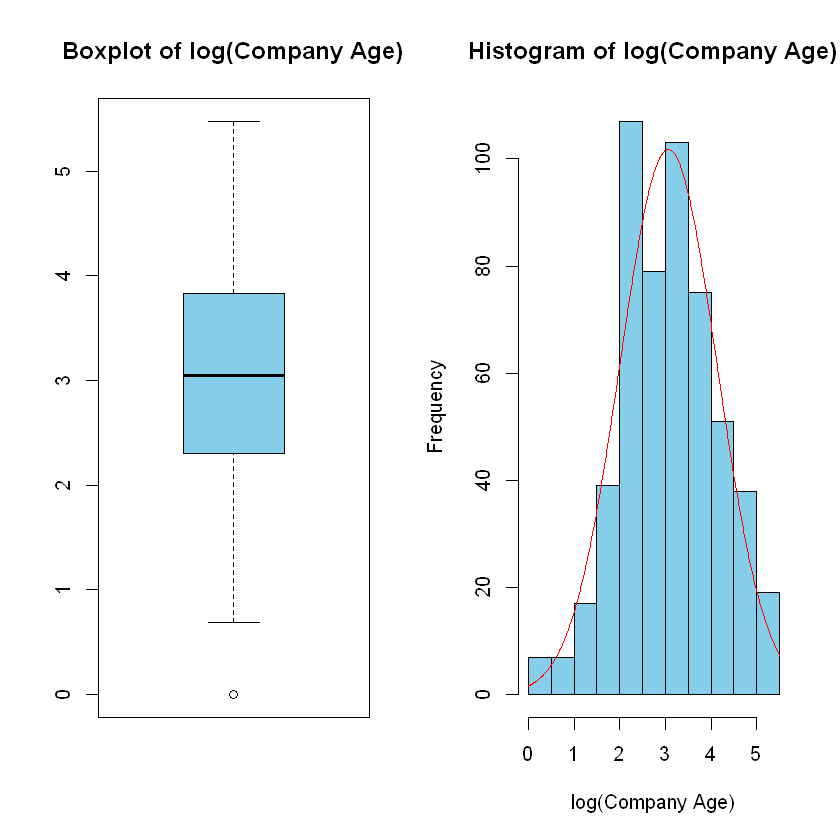

In [177]:
ln_age <- log(df_new$company_age[df_new$company_age>0])
sum(df_new$company_age<=0)/nrow(df_new)*100
par(mfrow=c(1, 2))
boxplot(ln_age, main="Boxplot of log(Company Age)", col="skyblue")
hist(ln_age, xlab="log(Company Age)", main="Histogram of log(Company Age)", col="skyblue")
xpt <- seq(0, 5.5, by=0.01)
nden <- dnorm(xpt, mean(ln_age), sd(ln_age))
ypt <- nden*(nrow(df_new) - sum(df_new$company_age<=0))*0.5
lines(xpt, ypt, col="red")

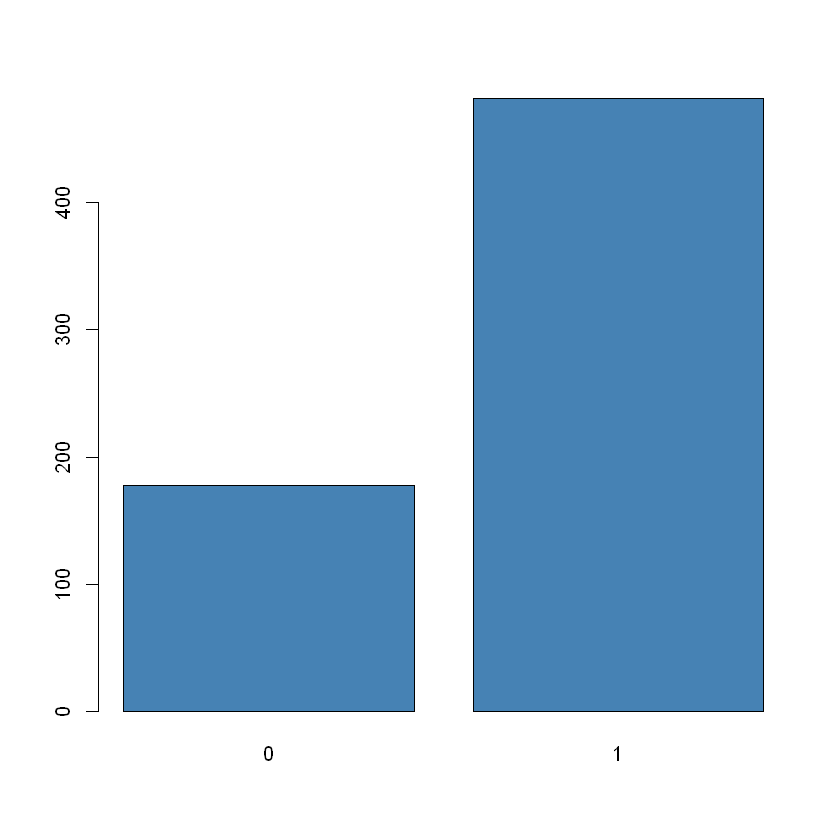

In [23]:
# Python
barplot(table(df_new$python), col="steelblue")

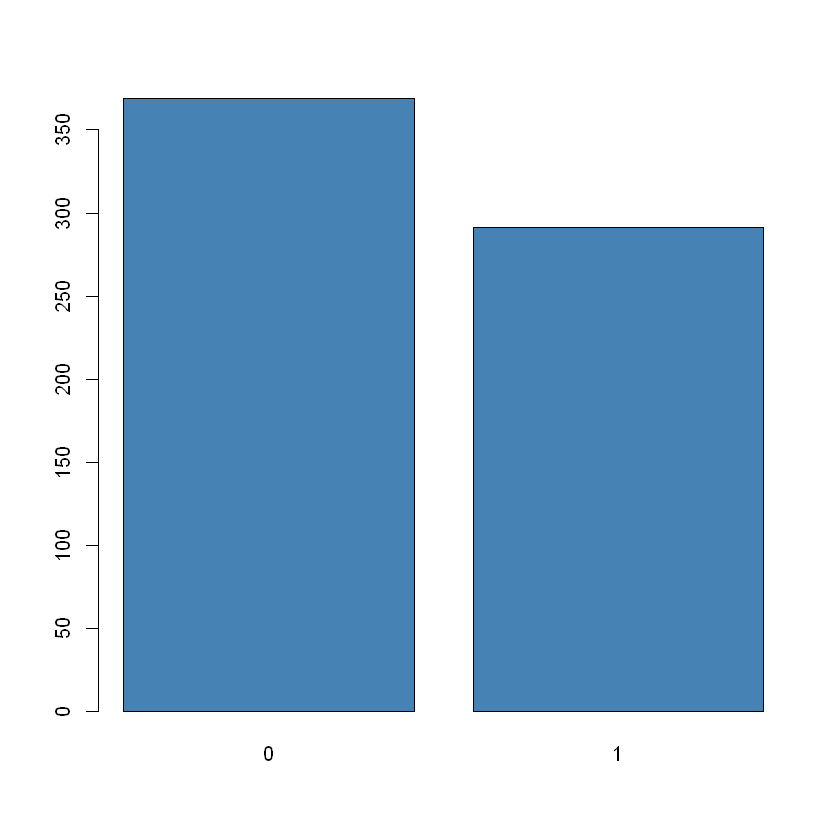

In [24]:
# Excel
barplot(table(df_new$excel), col="steelblue")

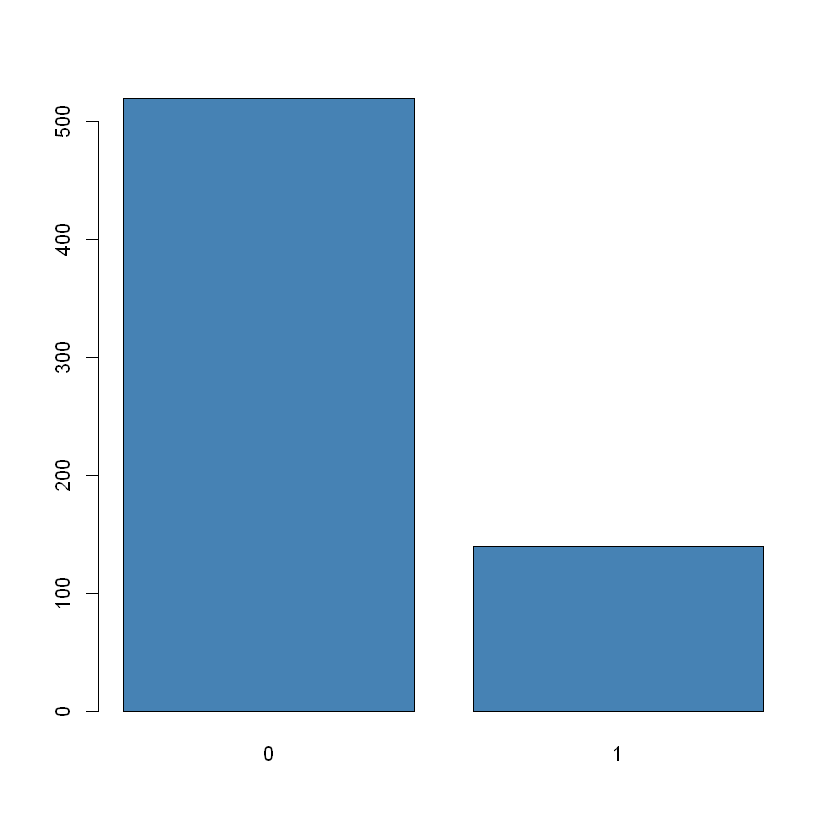

In [25]:
# Hadoop
barplot(table(df_new$hadoop), col="steelblue")

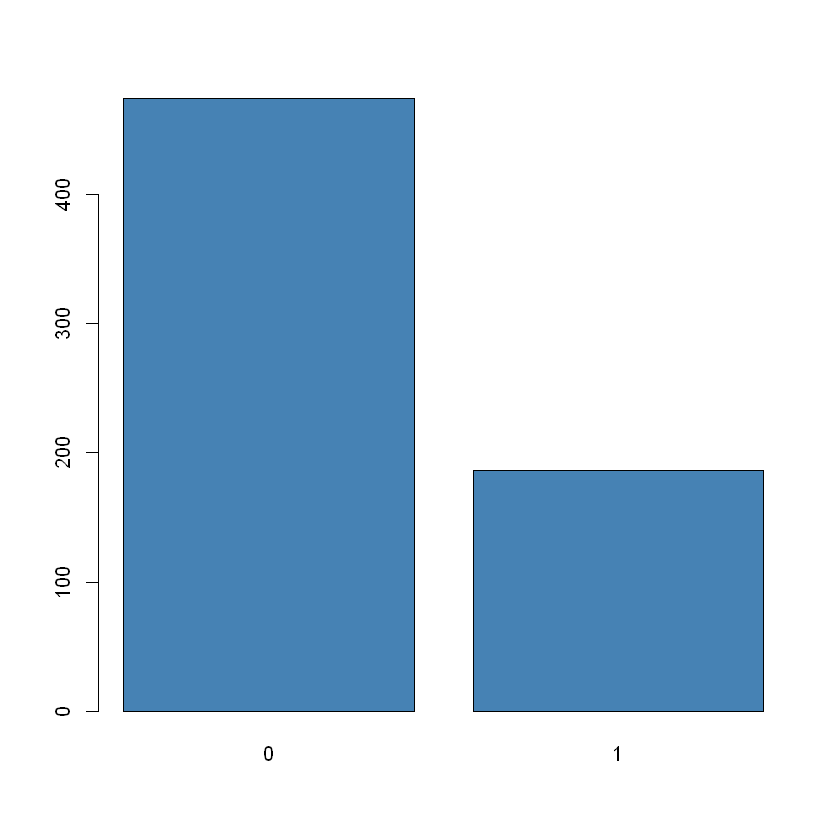

In [26]:
# Spark
barplot(table(df_new$spark), col="steelblue")

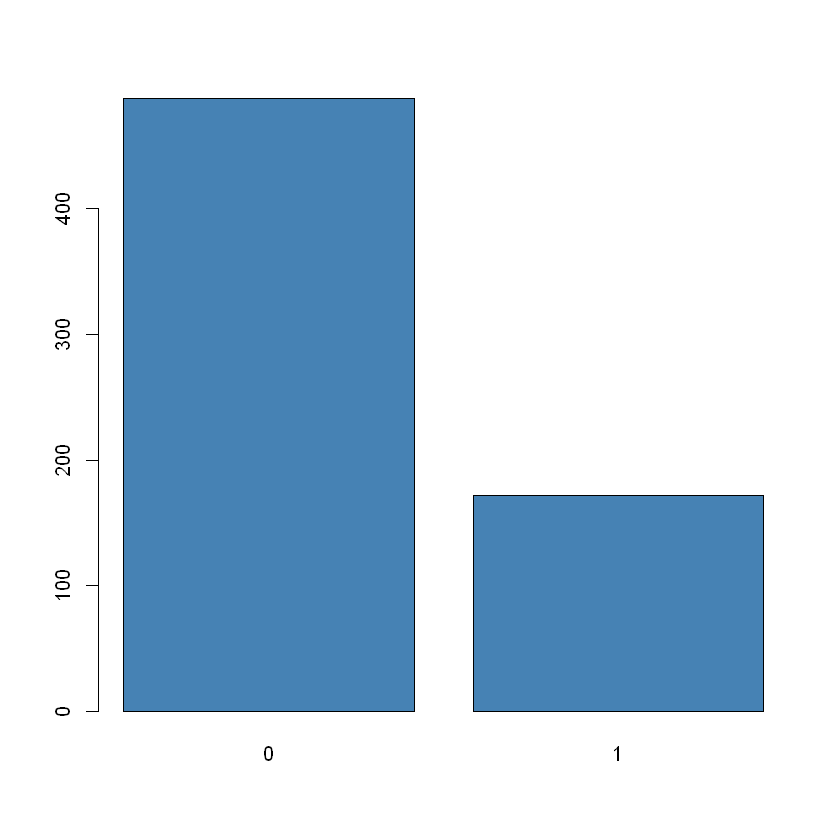

In [27]:
# AWS
barplot(table(df_new$aws), col="steelblue")

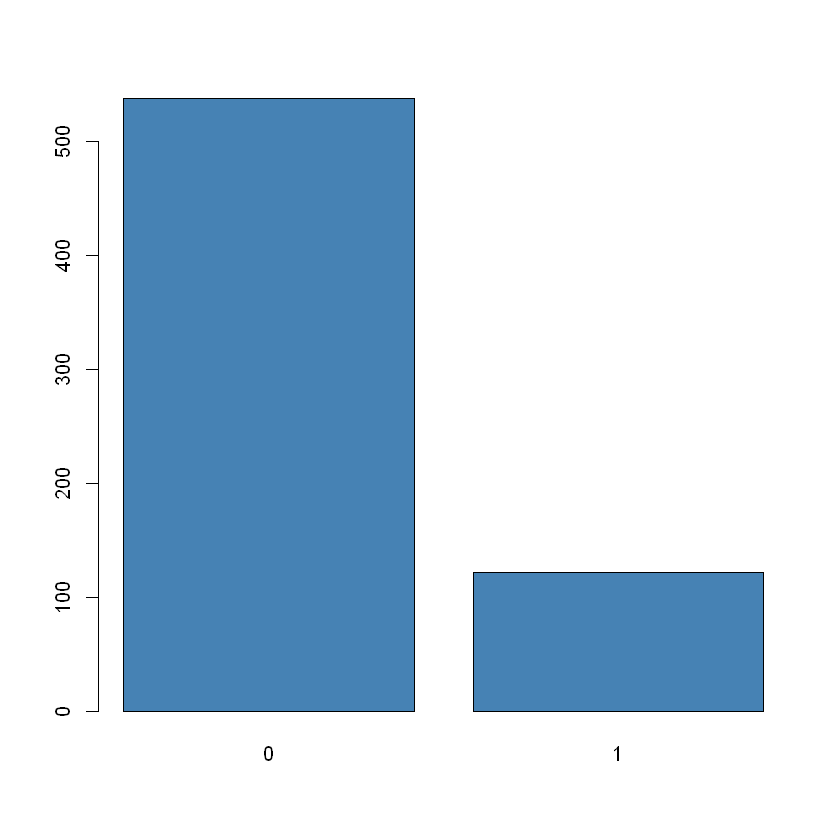

In [28]:
# Tableau
barplot(table(df_new$tableau), col="steelblue")

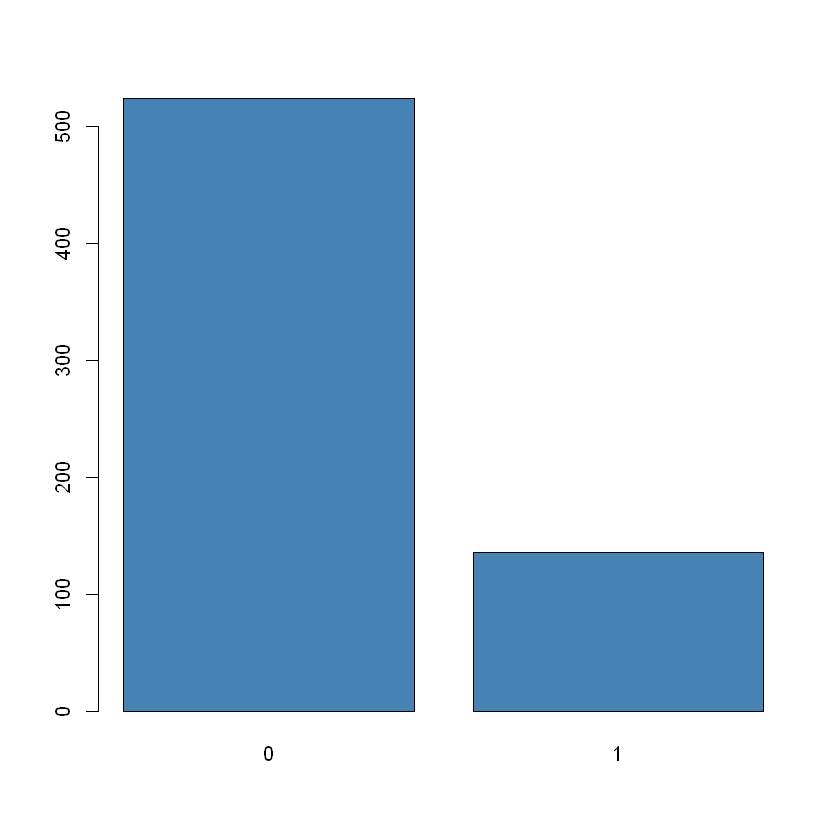

In [29]:
# Big Data
barplot(table(df_new$big_data), col="steelblue")

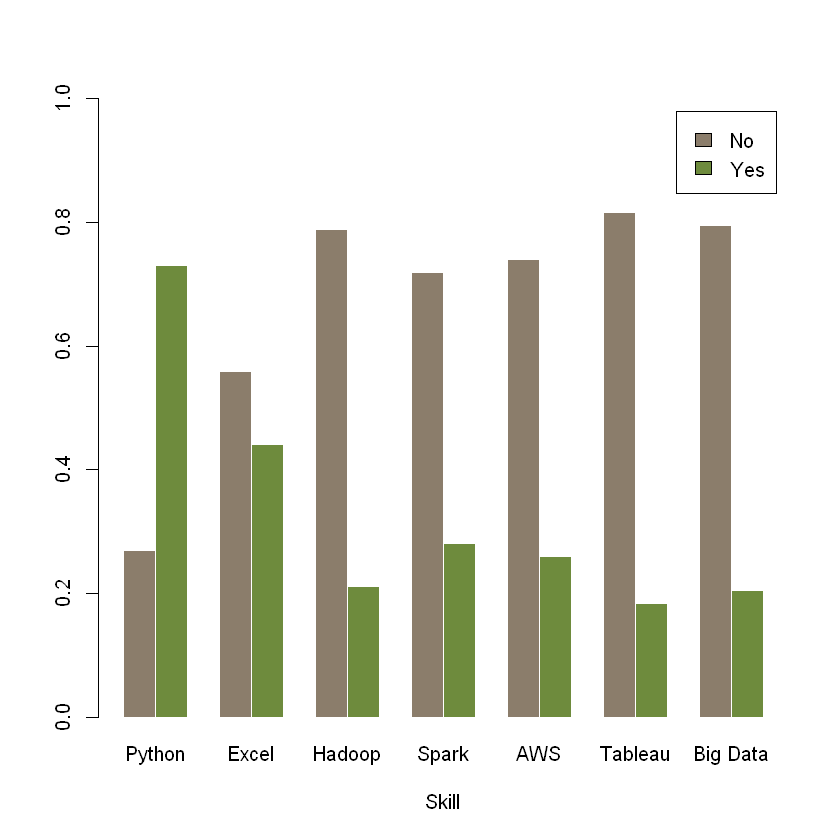

In [350]:
# All skills
#Create a grouped dataframe
python <- as.data.frame(table(df_new$python))
excel <- as.data.frame(table(df_new$excel))
hadoop <- as.data.frame(table(df_new$hadoop))
spark <- as.data.frame(table(df_new$spark))
aws <- as.data.frame(table(df_new$aws))
tableau <- as.data.frame(table(df_new$tableau))
big_data <- as.data.frame(table(df_new$big_data))
data <- matrix(c(python$Freq, excel$Freq, hadoop$Freq, spark$Freq, aws$Freq, tableau$Freq, big_data$Freq), nrow=2)
colnames(data) <- c("Python", "Excel", "Hadoop", "Spark", "AWS", "Tableau", "Big Data")
rownames(data) <- c("No", "Yes")

# Grouped barplot
barplot(prop.table(data, 2), 
        col=colors()[c(23,89)] , 
        border="white", 
        font.axis=1, 
        beside=T, 
        legend=rownames(data),
        xlab="Skill", 
        ylim=c(0, 1),
        font.lab=1)

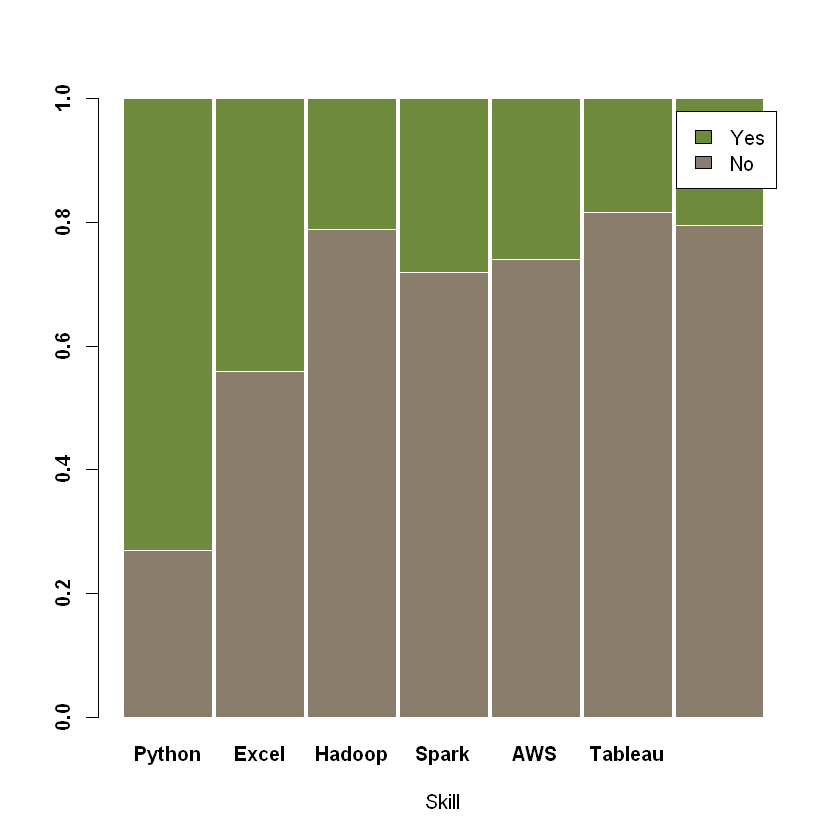

In [352]:
# Stacked barplot
barplot(prop.table(data, 2), 
        col=colors()[c(23,89)] , 
        border="white", 
        space=0.04, 
        font.axis=2, 
        legend=rownames(data),
        ylim=c(0, 1),
        xlab="Skill")

In [105]:
# Job Simplified
job_simp <- as.data.frame(table(df_new$job_simp))
job_simp <- job_simp[order(job_simp$Freq, decreasing=TRUE), ]
job_simp

,Var1,Freq
3,data scientist,447
7,na,68
1,analyst,55
2,data engineer,46
6,mle,34
5,manager,7
4,director,3


In [106]:
Title <- c("Data Scientist", "Other", "Data Analyst", "Data Engineer", "Machine Learning Engineer", "Manager", "Director")
job_simp <- cbind(job_simp, Title)
job_simp <- job_simp[, c("Title", "Freq")]
job_simp

,Title,Freq
3,Data Scientist,447
7,Other,68
1,Data Analyst,55
2,Data Engineer,46
6,Machine Learning Engineer,34
5,Manager,7
4,Director,3


In [104]:
job_simp[1, 1]/sum(job_simp$Freq)*100

[1] 67.72727

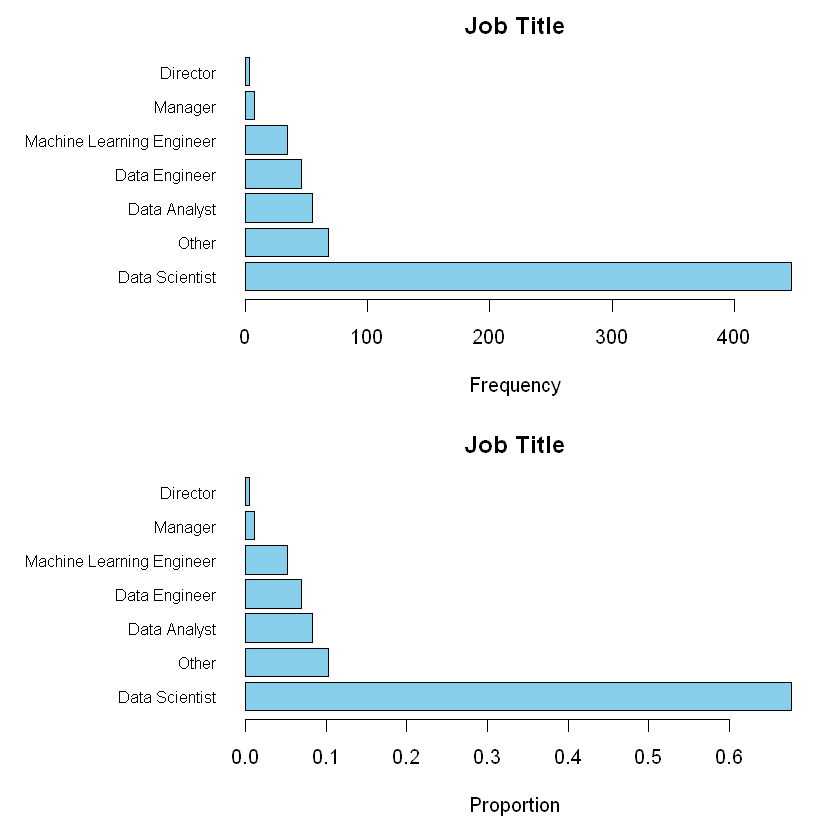

In [207]:
par(mfrow=c(2, 1))
par(mar=c(5, 10, 2, 2))
barplot(job_simp$Freq, names.arg=job_simp$Title, horiz=TRUE, las=1, cex.names=0.8, xlab="Frequency", col="skyblue", main="Job Title")
barplot(prop.table(job_simp$Freq), names.arg=job_simp$Title, horiz=TRUE, las=1, cex.names=0.8, xlab="Proportion", col="skyblue", main="Job Title")

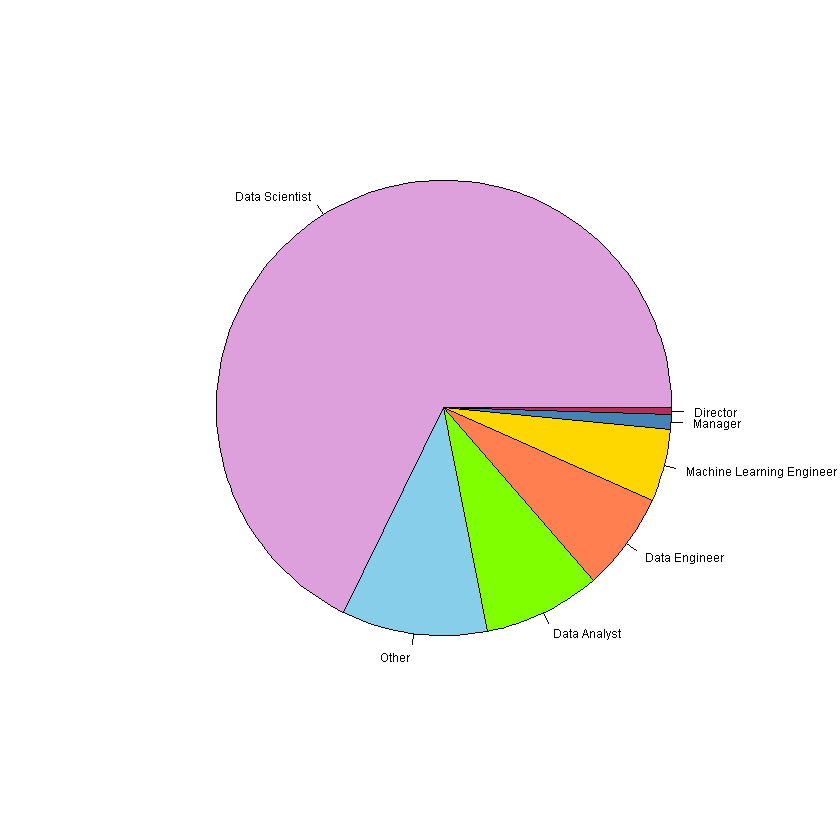

In [217]:
pie(job_simp$Freq, labels=job_simp$Title, col=c("plum", "skyblue", "chartreuse", "coral", "gold", "steelblue", "maroon"), cex=0.6)

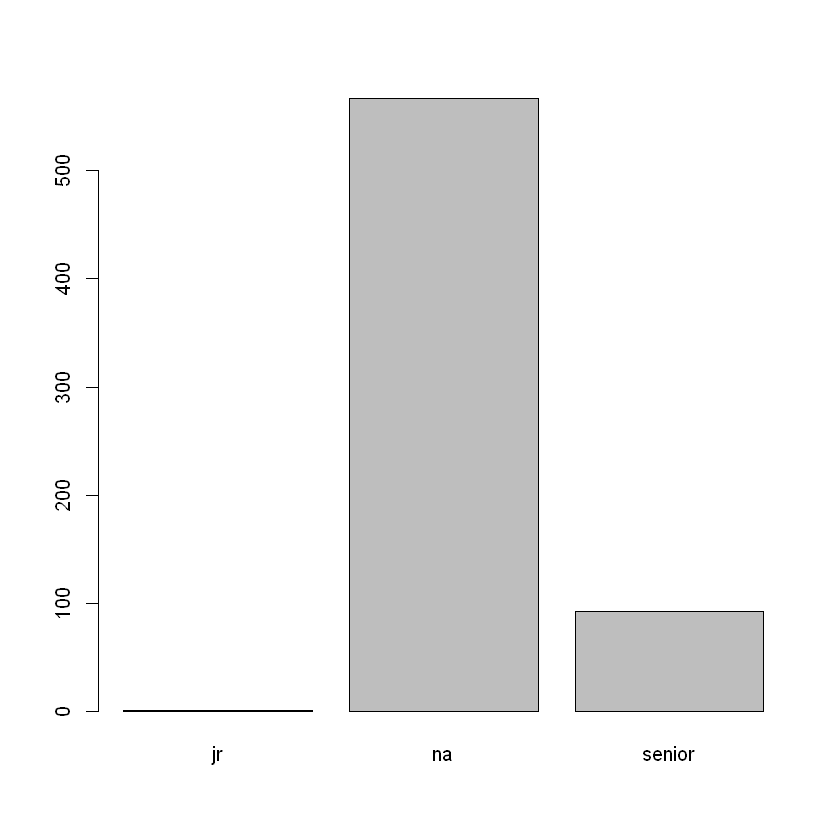

In [354]:
# Seniority
barplot(table(df_new$senior))

In [355]:
seniority <- as.data.frame(table(df_new$senior))
seniority

Var1,Freq
jr,1
na,567
senior,92


In [359]:
Senior <- c("Yes", "No")
Freq <- c(sum(df_new$senior=="senior"), sum(df_new$senior!="senior"))
seniority_new <- data.frame(Senior, Freq)
seniority_new

Senior,Freq
Yes,92
No,568


In [364]:
92/6.6

[1] 13.93939

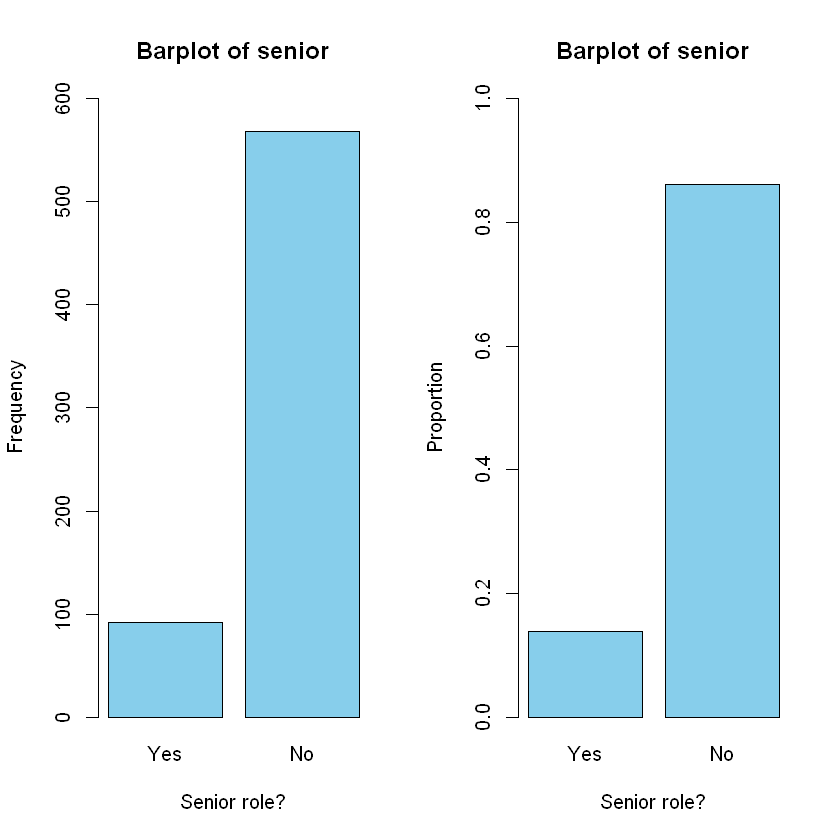

In [363]:
par(mfrow=c(1, 2))
barplot(seniority_new$Freq, names.arg=seniority_new$Senior, xlab="Senior role?", main="Barplot of senior", 
        ylab="Frequency", ylim=c(0, 600), col="skyblue")
barplot(prop.table(seniority_new$Freq), names.arg=seniority_new$Senior, xlab="Senior role?", main="Barplot of senior", 
        ylab="Proportion", ylim=c(0, 1), col="skyblue")